# 1.4.12 Template Matching

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
img_gray_mode = cv2.imread('hmson2.png', 0) #mario hmson2

In [5]:
img_rgb = cv2.imread('hmson2.png') #mario hmson2
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

In [4]:
cv2.imshow('img_gray_mode',img_gray_mode)
cv2.imshow('img_gray',img_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# diff = img_gray_mode - img_gray
diff = cv2.bitwise_xor(img_gray, img_gray_mode)

In [ ]:
print(diff)

In [8]:
cv2.imshow('diff',diff)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
img = cv2.imread('hmson2.png',0) #mario
img2 = img.copy()
template = cv2.imread('template.png',0) #coin
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
    'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

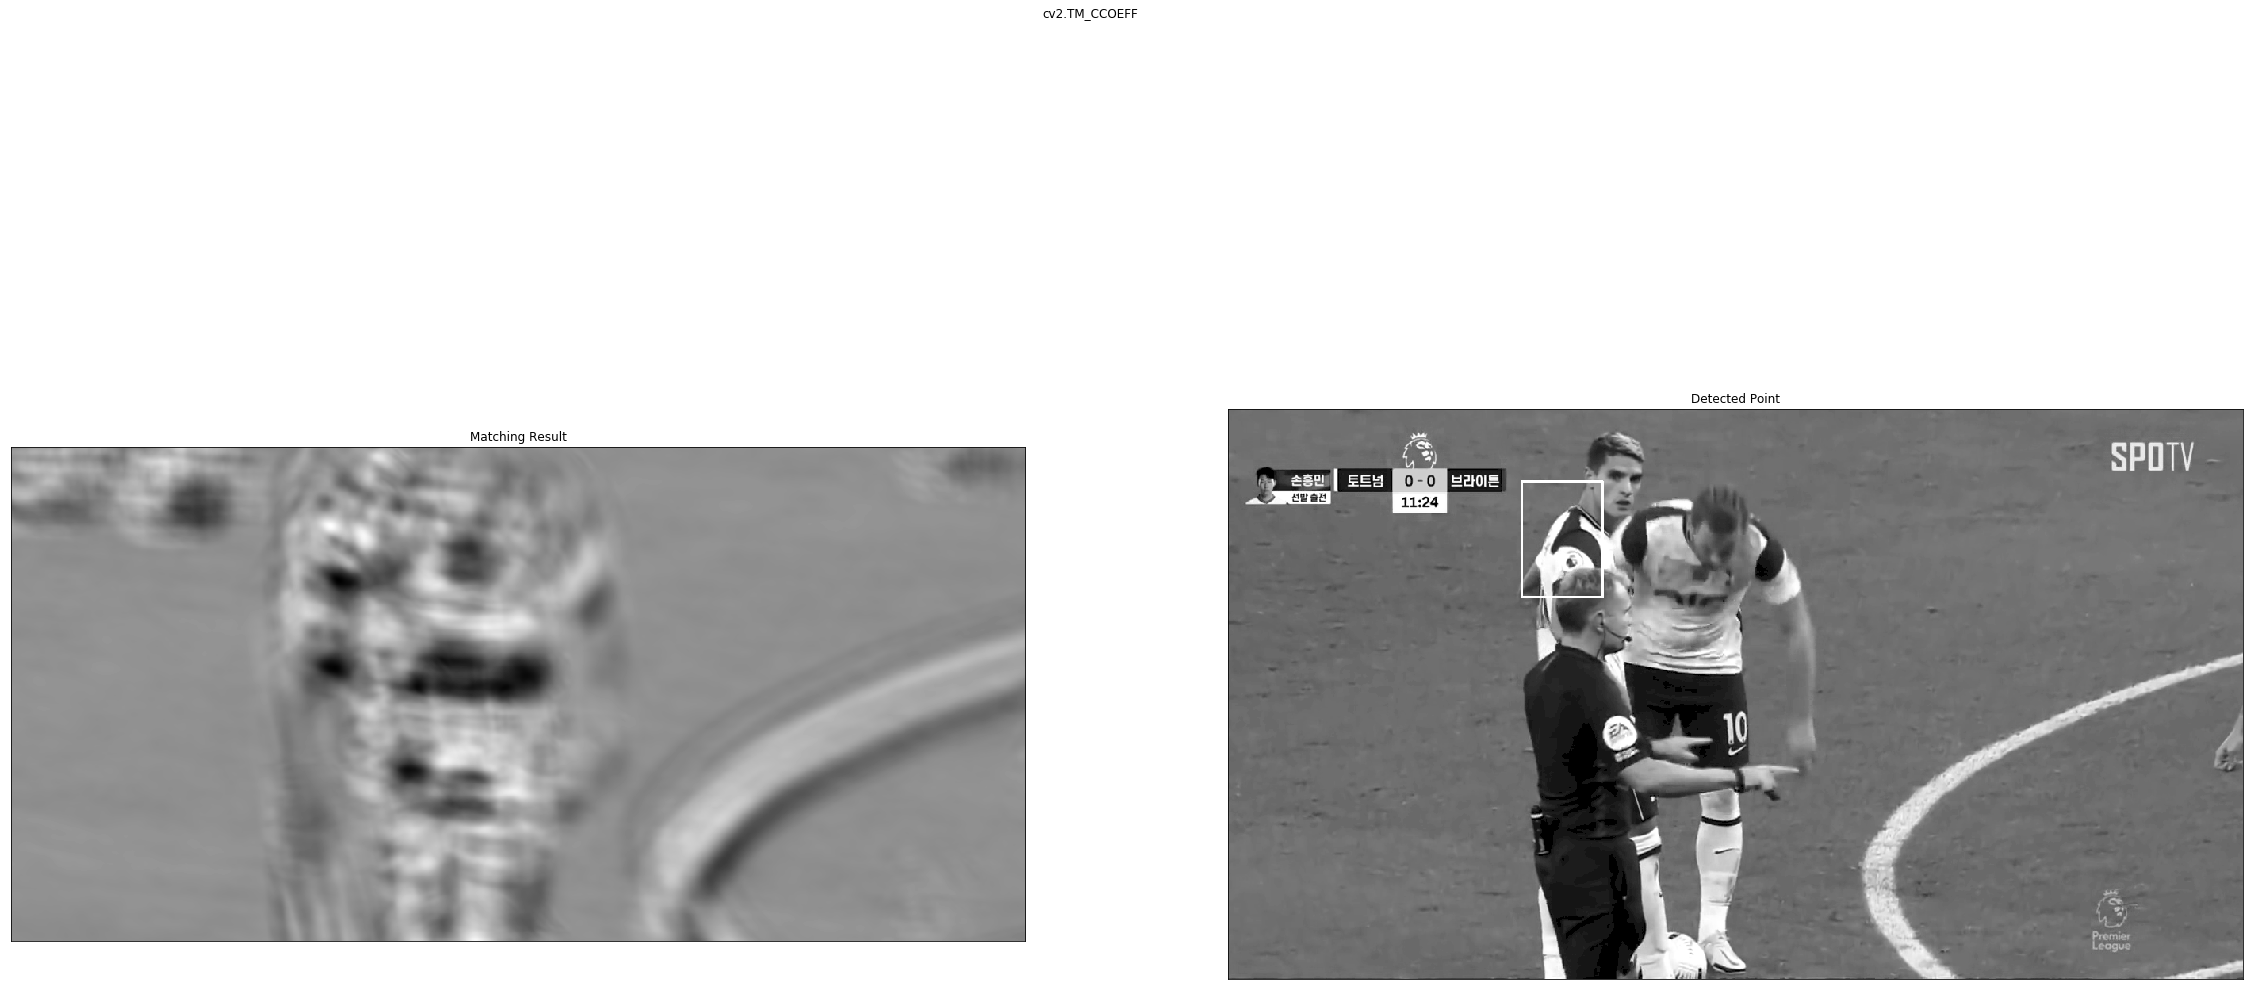

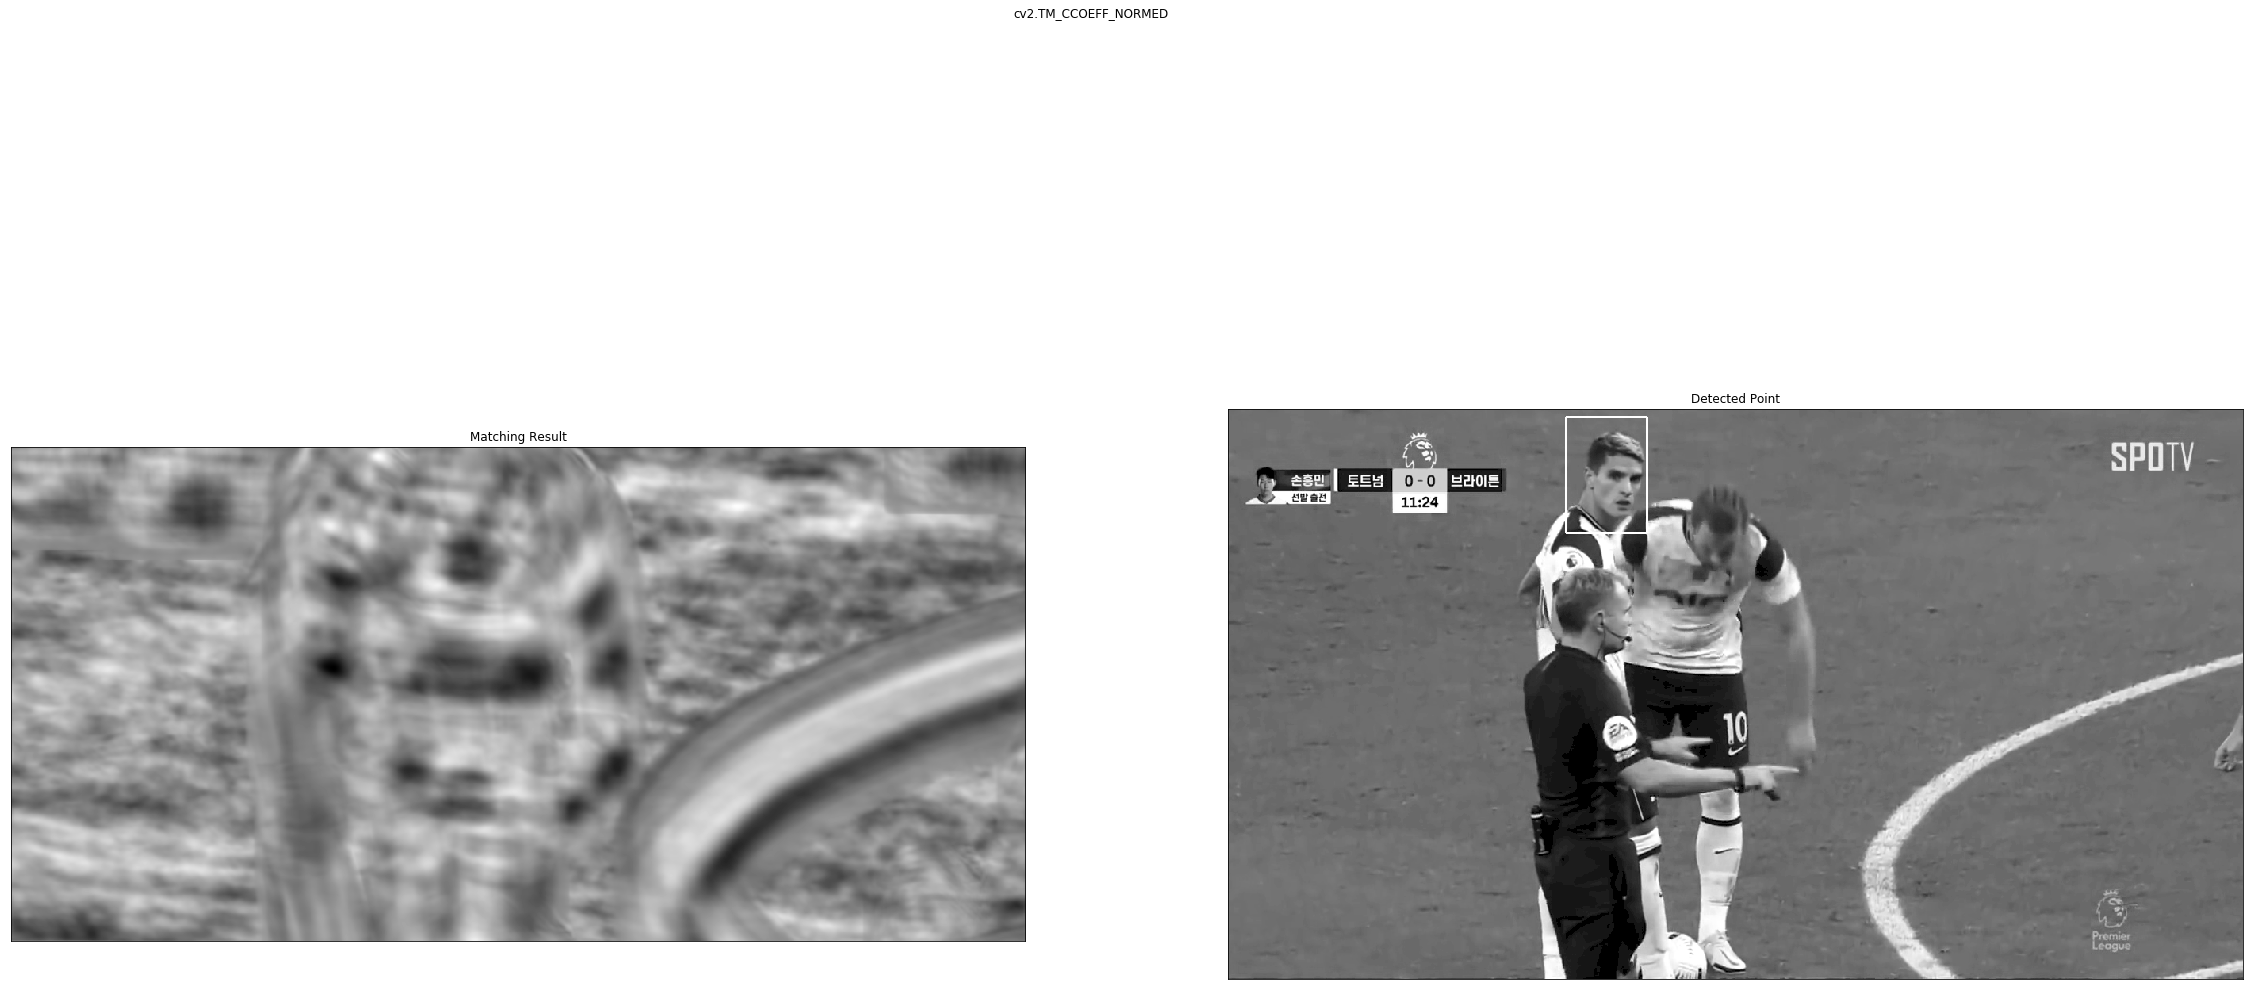

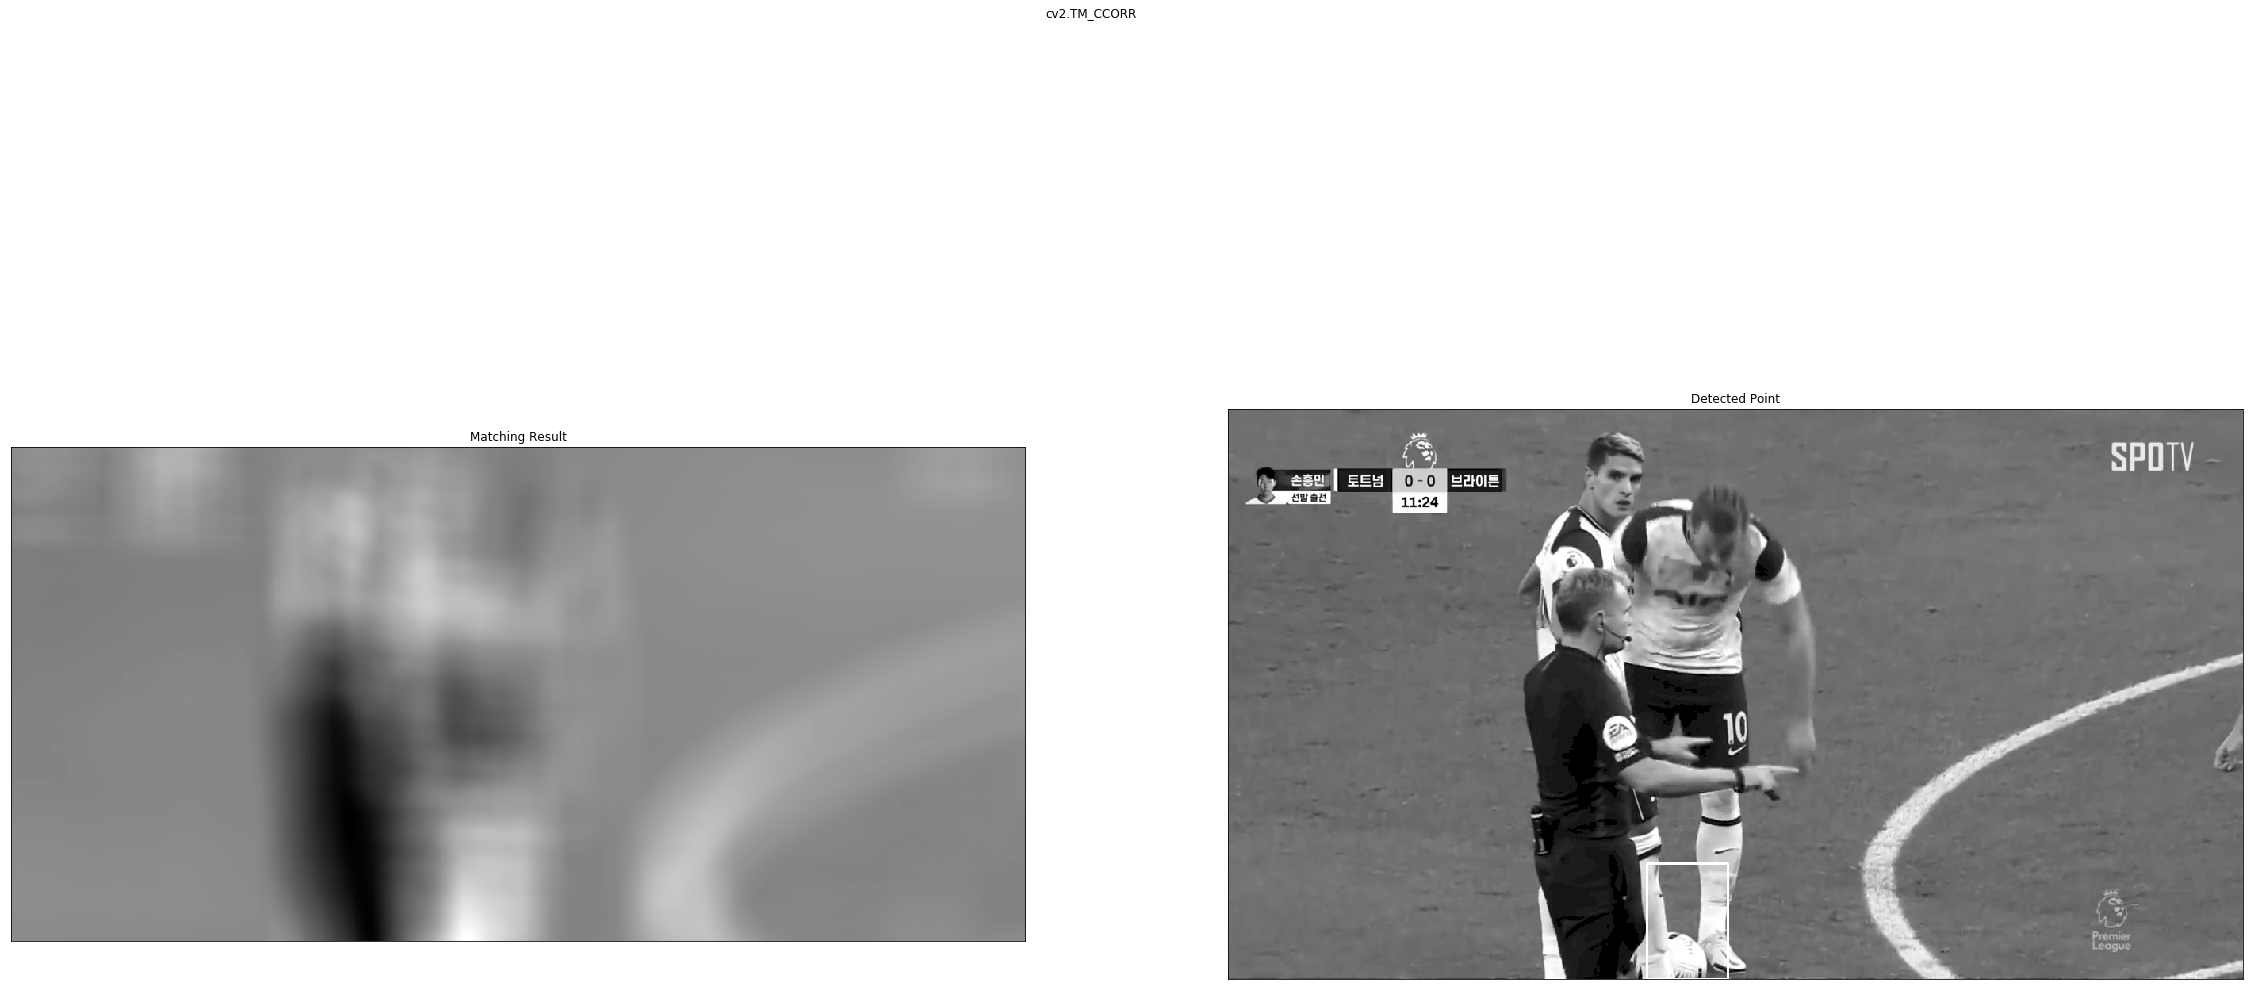

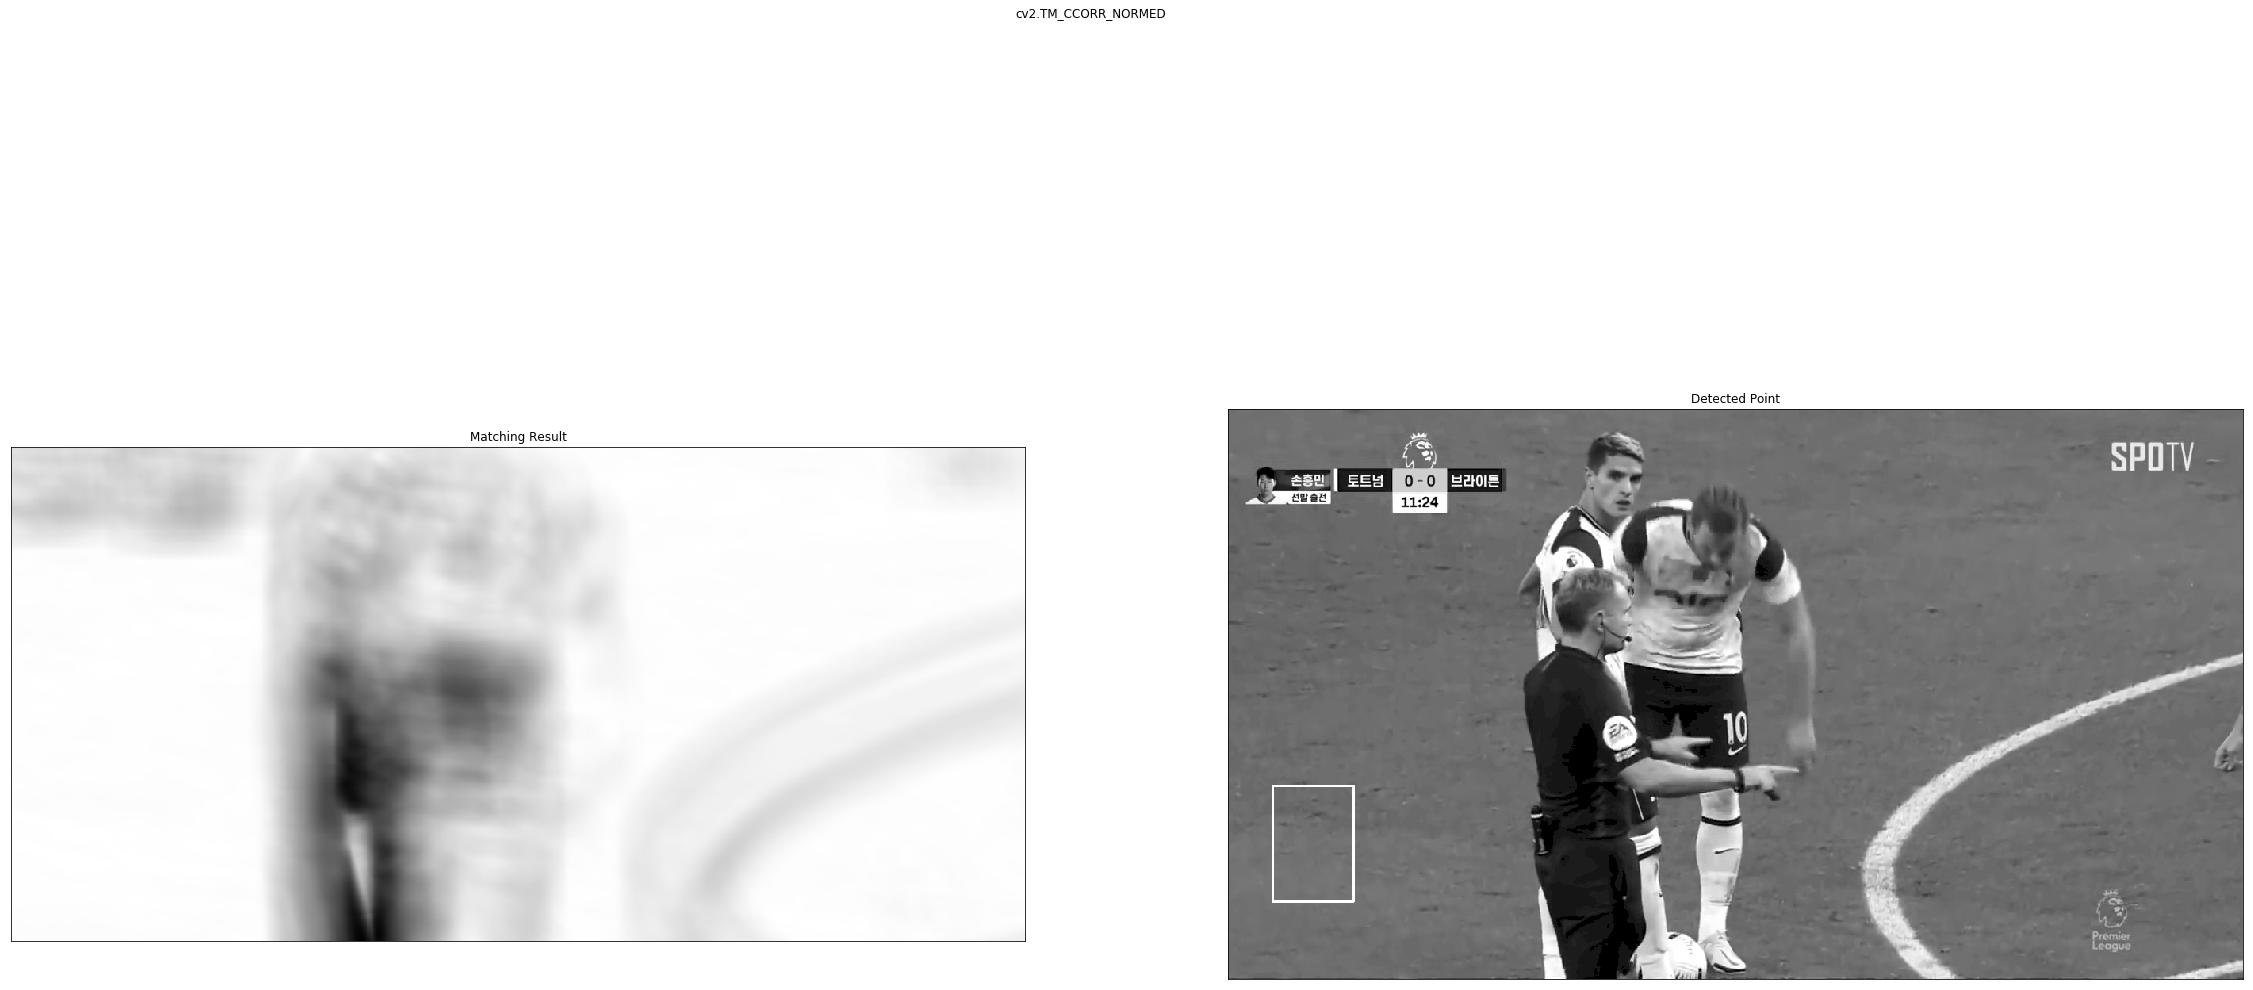

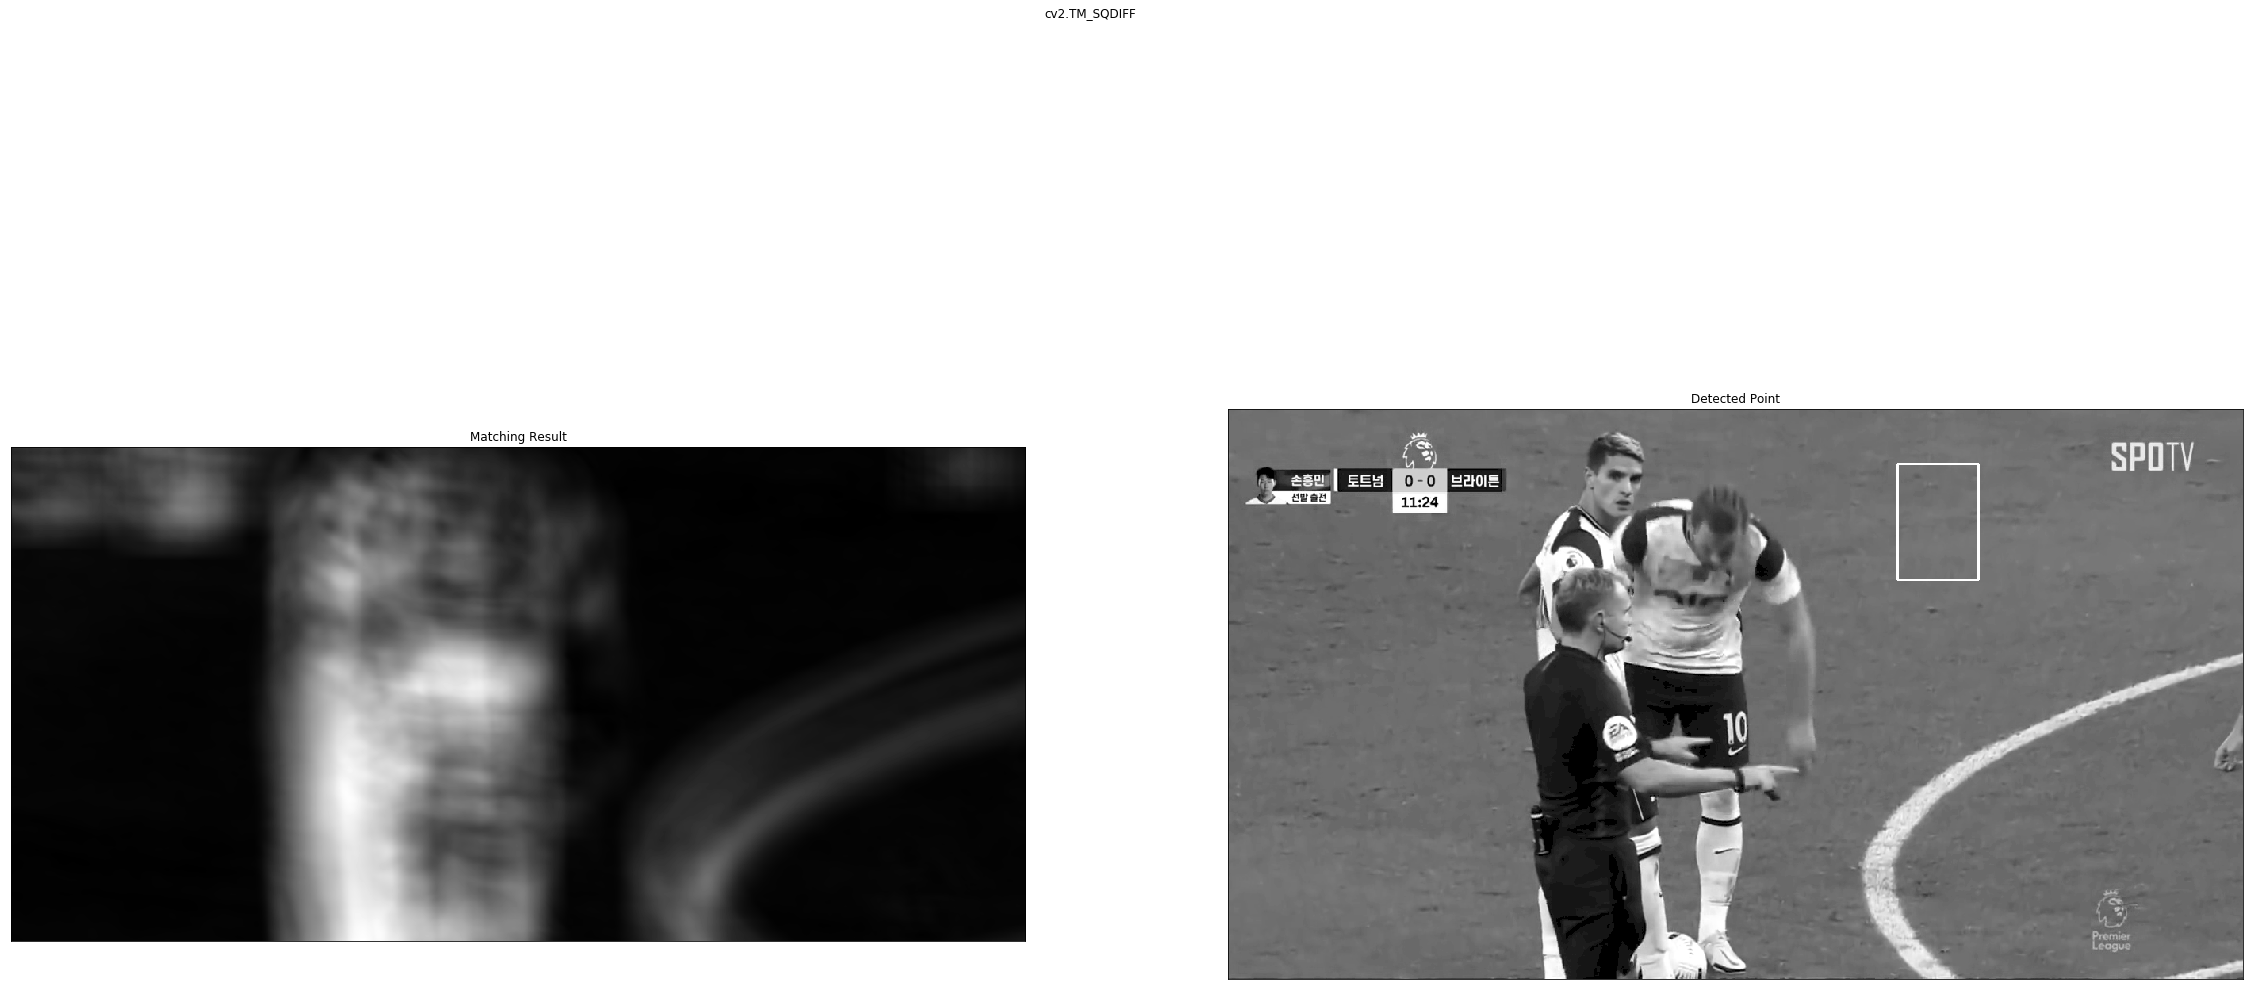

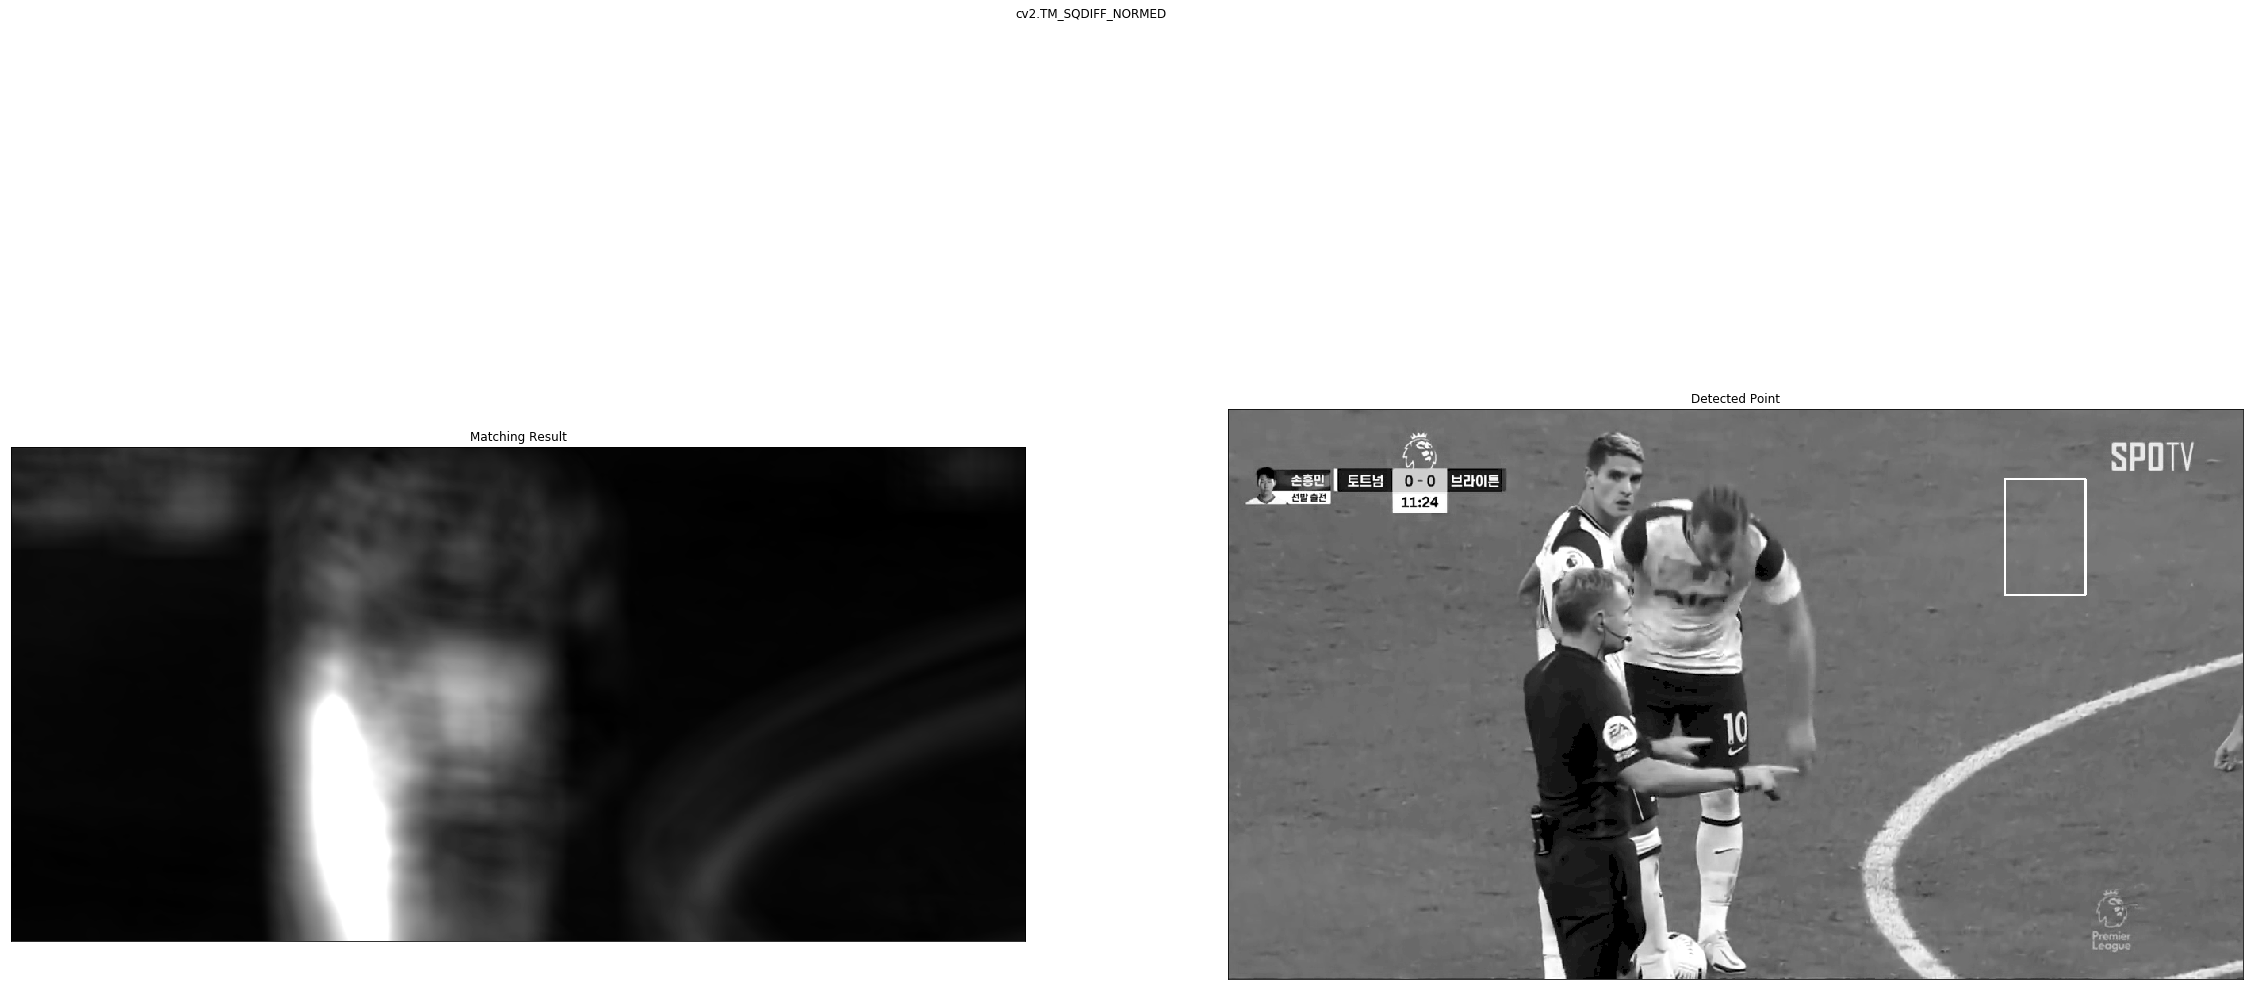

In [10]:
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img,top_left, bottom_right, 255, 2)
    plt.figure(figsize=(40,20))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

In [11]:
img_gray = cv2.imread('mario.png', 0) #mario hmson2
#img_rgb = cv2.imread('hmson2.png') #mario hmson2
#img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

In [12]:
cv2.imshow('img_gray',img_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
template = cv2.imread('coin.png',0) #coin template

In [14]:
cv2.imshow('coin',template)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
w, h = template.shape[::-1]
print(w,h)

49 52


In [16]:
res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED) #cv2.TM_CCOEFF cv2.TM_CCOEFF_NORMED

In [17]:
cv2.imshow('res',res)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
print(res)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [-0.05620336 -0.06636337 -0.07939707 ... -0.068192   -0.03985433
  -0.01083601]
 [-0.05109231 -0.06003292 -0.07204188 ... -0.0783518  -0.05057818
  -0.02202075]
 [-0.05715846 -0.06617662 -0.07922592 ... -0.09380835 -0.06534113
  -0.03509604]]


In [19]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
print(min_val, max_val, min_loc, max_loc)

-0.5654518604278564 0.5840579271316528 (671, 476) (417, 251)


In [20]:
res=(res-min_val)/(max_val-min_val)
print(res)

[[0.49190697 0.49190697 0.49190697 ... 0.49190697 0.49190697 0.49190697]
 [0.49190697 0.49190697 0.49190697 ... 0.49190697 0.49190697 0.49190697]
 [0.49190697 0.49190697 0.49190697 ... 0.49190697 0.49190697 0.49190697]
 ...
 [0.4430136  0.43417507 0.42283657 ... 0.4325843  0.45723623 0.48248032]
 [0.4474599  0.43968216 0.42923513 ... 0.4237459  0.44790718 0.4727503 ]
 [0.44218275 0.43433753 0.42298546 ... 0.4102997  0.43506438 0.46137562]]


In [21]:
cv2.imshow('res',res)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [22]:
threshold = 0.8
loc = np.where(res >= threshold)

In [23]:
print(loc[::-1])

(array([545, 546, 551, ..., 723, 721, 552], dtype=int64), array([ 18,  18,  18, ..., 454, 455, 460], dtype=int64))


In [24]:
img_rgb = cv2.imread('mario.png') #mario hmson2
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (255,0,255), 1)

In [25]:
cv2.imshow('dst',img_rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [26]:
cv2.imwrite('res.png',img_rgb)

True

In [27]:
def nothing(x):
    pass

In [29]:
cv2.namedWindow('image')
cv2.createTrackbar('threshold', 'image', 200, 255,nothing)
while(1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    threshold = cv2.getTrackbarPos('threshold', 'image')
    loc = np.where(res >= threshold/255.)
    img_rgb = cv2.imread('mario.png')
    for pt in zip(*loc[::-1]):
        cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (255,0,255), 1)
    cv2.imshow('image',img_rgb)
cv2.destroyAllWindows()

In [90]:
img_gray_mode = cv2.imread('hmson2.png', 0) #mario hmson2
img_rgb = cv2.imread('hmson2.png') #mario hmson2
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

# diff = img_gray_mode - img_gray
diff = cv2.bitwise_xor(img_gray, img_gray_mode)

In [91]:
print(diff)

[[ 29  29  29 ...   4   4   4]
 [ 31  31  31 ...   4   4   4]
 [  4   4   4 ...   4   4   4]
 ...
 [  3   3   3 ...   5  63   4]
 [  5   3   3 ...  27   4   4]
 [  4  27  27 ... 123 123 127]]


In [92]:
cv2.imshow('dst',diff)
cv2.waitKey(0)
cv2.destroyAllWindows()

https://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python